<a href="https://colab.research.google.com/github/LeDinhHung2211/AI_NeuralNmetwork/blob/main/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout

In [ ]:
(X_train, y_train),(X_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 11s 0us/step


In [ ]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
#x_test,x_train là mảng 4 chiều để chuyển về 2 chiều ta lấy 32*32*3
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2]*X_test.shape[3])

In [ ]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((50000, 3072), (50000, 1), (10000, 3072), (10000, 1))

In [ ]:
#chuẩn hóa 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255


In [ ]:
# 100 class
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
# buid model ANN
model = Sequential()
model.add(Dense(600,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               1843800   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               240400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=300,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])


Epoch 1/300
313/313 [==============================] - 7s 11ms/step - loss: 4.4469 - accuracy: 0.0333 - val_loss: 4.1664 - val_accuracy: 0.0561
Epoch 2/300
313/313 [==============================] - 3s 9ms/step - loss: 4.1181 - accuracy: 0.0659 - val_loss: 4.0296 - val_accuracy: 0.0829
Epoch 3/300
313/313 [==============================] - 3s 9ms/step - loss: 3.9560 - accuracy: 0.0910 - val_loss: 3.8068 - val_accuracy: 0.1179
Epoch 4/300
313/313 [==============================] - 3s 9ms/step - loss: 3.8671 - accuracy: 0.1039 - val_loss: 3.7550 - val_accuracy: 0.1294
Epoch 5/300
313/313 [==============================] - 3s 10ms/step - loss: 3.7986 - accuracy: 0.1149 - val_loss: 3.6973 - val_accuracy: 0.1439
Epoch 6/300
313/313 [==============================] - 3s 10ms/step - loss: 3.7448 - accuracy: 0.1264 - val_loss: 3.6962 - val_accuracy: 0.1383
Epoch 7/300
313/313 [==============================] - 3s 10ms/step - loss: 3.6982 - accuracy: 0.1319 - val_loss: 3.6270 - val_accuracy: 0.

In [ ]:
#in sai so va do chinh xac
score = model.evaluate(X_test,y_test,verbose=0)
print('Sai số ',score[0])
print('Độ chính xác',score[1])


Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


Sai số kiểm tra là:  3.5204930305480957
Độ chính xác kiểm tra là:  0.1809999942779541


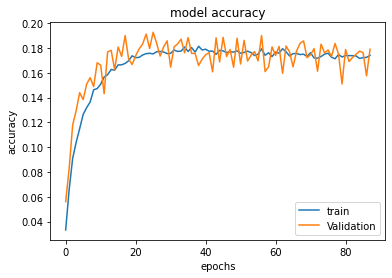

In [ ]:
# vẽ quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()


In [ ]:
dudoan= ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
dudoan = np.array(dudoan)

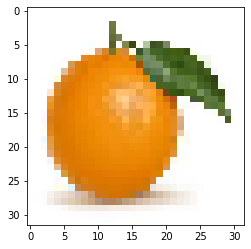

array(['orange'], dtype='<U13')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/orange.png"


img = load_img(filename,target_size=(32,32))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis=-1)

dudoan[kq]